In [1]:
import pandas as pd

In [2]:
cmd_vel_raw = pd.read_csv('data/raw/session_2023-04-12_impossible_obstacle_cmd_vel.csv')
local_map_raw = pd.read_csv('data/raw/session_2023-04-12_impossible_obstacle_local_map.csv')

In [3]:
cmd_vel = pd.DataFrame()
local_map = pd.DataFrame()

cmd_vel['time'] = pd.to_datetime(cmd_vel_raw['%time'])
cmd_vel['cmd_vel'] = cmd_vel_raw[list(cmd_vel_raw.columns[1:])].values.tolist()
local_map['time'] = pd.to_datetime(local_map_raw['%time'])
local_map['map'] = local_map_raw[list(local_map_raw.columns[15:])].values.tolist()

print(len(cmd_vel))
print(len(local_map))

1721
1407


In [4]:
data = local_map
data['cmd_vel'] = None
print(len(data))

1407


In [5]:
for i, time in enumerate(local_map['time']):
    idx = cmd_vel['time'].sub(time).abs().idxmin()
    local_map['cmd_vel'][i] = cmd_vel['cmd_vel'][idx]

/tmp/ipykernel_28612/2437529825.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  local_map['cmd_vel'][i] = cmd_vel['cmd_vel'][idx]


In [6]:
data.head()

,time,map,cmd_vel
0,2023-04-12 22:23:28.834635180,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-0.0, -0.0, 0.0, 0.0, 0.0, -0.0]"
1,2023-04-12 22:23:28.879526315,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-0.0, -0.0, 0.0, 0.0, 0.0, -0.0]"
2,2023-04-12 22:23:28.893630684,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-0.0, -0.0, 0.0, 0.0, 0.0, -0.0]"
3,2023-04-12 22:23:28.923093265,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-0.0, -0.0, 0.0, 0.0, 0.0, -0.0]"
4,2023-04-12 22:23:28.937227773,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-0.0, -0.0, 0.0, 0.0, 0.0, -0.0]"


In [22]:
import torch
grids = torch.as_tensor(data['map'].to_list()[103:])  # cut out beginning
commands = torch.as_tensor(data['cmd_vel'].to_list()[103:])

grids = grids.view((grids.shape[0], 100, 100))
grids[grids==100]=1

print(grids.shape)
print(commands.shape)

torch.Size([1304, 100, 100])
torch.Size([1304, 6])


In [23]:
from utils import save_grids_as_video
freq_in = 40.0
freq_out = 10.0

grids_to_save = range(0, grids.shape[0], int(freq_in/freq_out))

video_filename = f"videos/impossible_obstacle.avi"

save_grids_as_video(grids, grids_to_save, video_filename, freq_out)

Video saved as videos/impossible_obstacle.avi


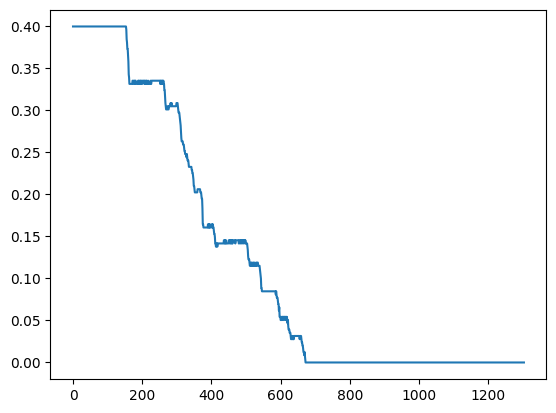

In [24]:
import matplotlib.pyplot as plt
plt.plot(commands[:,0])
plt.show()

In [25]:
torch.save({grids, commands}, 'data/impossible_obstacle.pt')